# Week 10 - Initial Value Problems
## Kiran Shila - U54532811

In [1]:
using DifferentialEquations
using Plots
using ParameterizedFunctions

┌ Info: Recompiling stale cache file /home/kiran/.julia/compiled/v1.1/DifferentialEquations/UQdwS.ji for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /home/kiran/.julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /home/kiran/.julia/compiled/v1.1/ParameterizedFunctions/OKjOc.ji for ParameterizedFunctions [65888b18-ceab-5e60-b2b9-181511a3b968]
└ @ Base loading.jl:1184


The `DifferentialEquations.jl` package is a HUGE component of the Julia language. It has many many solvers and setup configurations.

We start by defining the problem to solve - the DE for an RL circuit
\begin{equation}
\frac{dI}{dt} = -\frac{R}{L}I(t) + \frac{V}{L}
\end{equation}

Where $I(0) = I_0$

Now we will make the following assumptions:
$R= 1,L= 1,$ and $E_o= 1$

## Deliverable 1
We have to set up the problem so we can numerically integrate the IVP in (11) given the initial condition in (12) over the time interval [0,10] using the following methods:
* Eler Method
* Implicit Euler Method
* Fourth/Fifth order Runge-Kutta

The analytic solution is 
\begin{equation}
I(t) = Ce^{-\alpha t} + \frac{E_0}{R}
\end{equation}

with

\begin{equation}
\alpha=\frac{R}{L}, C=I_0-\frac{E_0}{R}
\end{equation}

Let's first look at the analytic solution with the function definition and the time step

In [2]:
# Analytic Solution
I(t::Number,R::Number,L::Number,E_0::Number,I_0::Number) = (I_0-(E_0/R))*exp(-(R/L)*t) + (E_0/R)
# Time vector to take points at
timeVec = range(0,10,step=0.1)

0.0:0.1:10.0

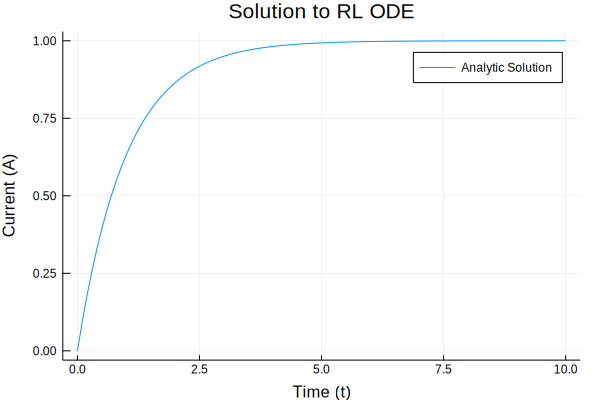

In [3]:
plot(timeVec,[I(t,1,1,1,0) for t in timeVec], label="Analytic Solution", xaxis="Time (t)", yaxis="Current (A)", title="Solution to RL ODE")

### Euler Method
Julia's `DE.jl` package has builtins for Euler and Implicit Euler. I just have to set up the equation using the values of $R,L,$ and $E_0$

In [4]:
dIdt(u,p,t) = -1.0*u+1.0
u0=0.0
tspan = (0.0,10.0)
prob = ODEProblem(dIdt,u0,tspan)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 10.0)
u0: 0.0

And now solving using Euler's Method - with a 0.1 second time step

In [5]:
sol = solve(prob,Euler(),dt=0.1); # Supressing the output

 Comparing the results

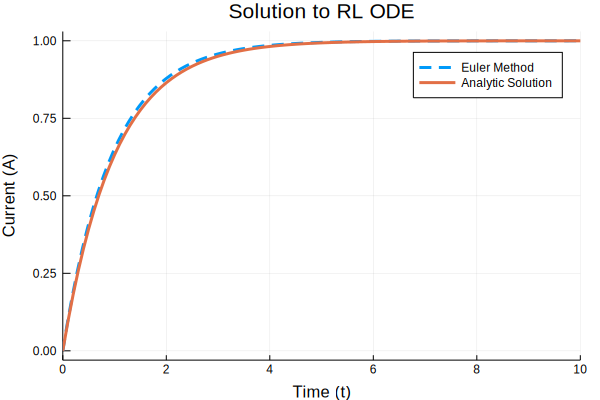

In [6]:
plot(sol,label="Euler Method",ls=:dash)
plot!(timeVec,[I(t,1,1,1,0) for t in timeVec], label="Analytic Solution", xaxis="Time (t)", yaxis="Current (A)", title="Solution to RL ODE",lw=3)

Now with a few different step sizes

In [7]:
sol1 = solve(prob,Euler(),dt=0.001)
sol2 = solve(prob,Euler(),dt=0.01)
sol3 = solve(prob,Euler(),dt=1)
sol4 = solve(prob,Euler(),dt=1.5)

retcode: Success
Interpolation: 3rd order Hermite
t: 8-element Array{Float64,1}:
  0.0
  1.5
  3.0
  4.5
  6.0
  7.5
  9.0
 10.0
u: 8-element Array{Float64,1}:
 0.0     
 1.5     
 0.75    
 1.125   
 0.9375  
 1.03125 
 0.984375
 1.0     

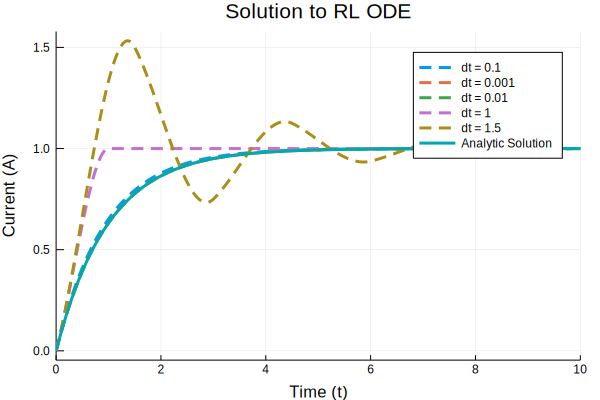

In [8]:
plot(sol,label="dt = 0.1",ls=:dash)
plot!(sol1,label="dt = 0.001",ls=:dash)
plot!(sol2,label="dt = 0.01",ls=:dash)
plot!(sol3,label="dt = 1",ls=:dash)
plot!(sol4,label="dt = 1.5",ls=:dash)
plot!(timeVec,[I(t,1,1,1,0) for t in timeVec], label="Analytic Solution", xaxis="Time (t)", yaxis="Current (A)", title="Solution to RL ODE",lw=3)

Interesting results - It seems as though the problem itself changed when the timestep went to 1.5. It looks like a damped oscillator instead of overdamped.

### Implicit Euler
Once again, using builtin Julia functions, ImplicitEuler() will do adaptive timestepping. They say this is for stiff problems.

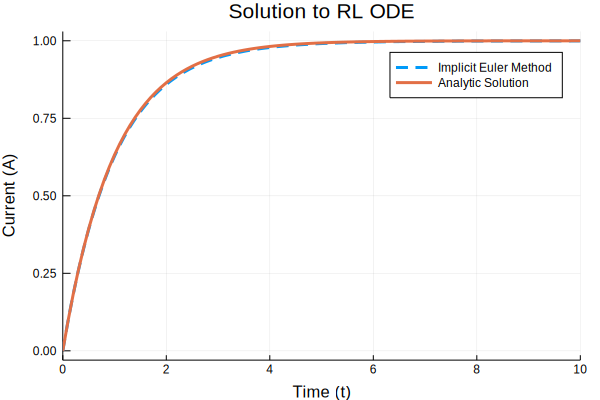

In [9]:
sol = solve(prob,ImplicitEuler())
plot(sol,label="Implicit Euler Method",ls=:dash)
plot!(timeVec,[I(t,1,1,1,0) for t in timeVec], label="Analytic Solution", xaxis="Time (t)", yaxis="Current (A)", title="Solution to RL ODE",lw=3)

Looks closer than the Euler method.

### Runge-Kutta

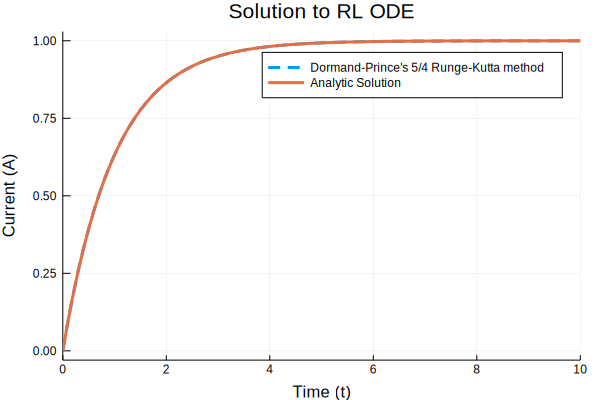

In [10]:
sol = solve(prob,DP5()) # Julia version of MATLAB's ode45()
plot(sol,label=" Dormand-Prince's 5/4 Runge-Kutta method",ls=:dash)
plot!(timeVec,[I(t,1,1,1,0) for t in timeVec], label="Analytic Solution", xaxis="Time (t)", yaxis="Current (A)", title="Solution to RL ODE",lw=3)

Spot on!

## Deliverable 2
### RLC Circuit
Using the definitions

In [28]:
d2Idt2(du,u,p,t) = (1/0.1)*155*sin(377*t) - (100/0.1)du - (1/(0.1*1e-3))u

d2Idt2 (generic function with 1 method)

In [29]:
u0 = 0.0
du0 = 0.0
tspan = (0.0,1.0)
prob = SecondOrderODEProblem(d2Idt2,du0,u0,tspan)

ODEProblem with uType Tuple{Float64,Float64} and tType Float64. In-place: false
timespan: (0.0, 1.0)
u0: (0.0, 0.0)

The exact solution is

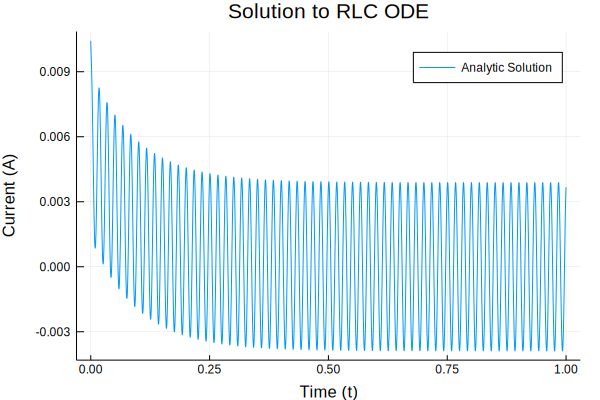

In [30]:
# Analytic Solution
I(t::Number) = 0.005213795953*exp(-10.10205140*t) + 0.001552158513*exp(-989.8979486*t) + 0.003661637439*cos(377*t) + 0.001283311653*sin(377*t)
# Time vector to take points at
timeVec = range(0,1,step=0.0001)
plot(timeVec,[I(t) for t in timeVec], label="Analytic Solution", xaxis="Time (t)", yaxis="Current (A)", title="Solution to RLC ODE")

And now to solve with the same timestep

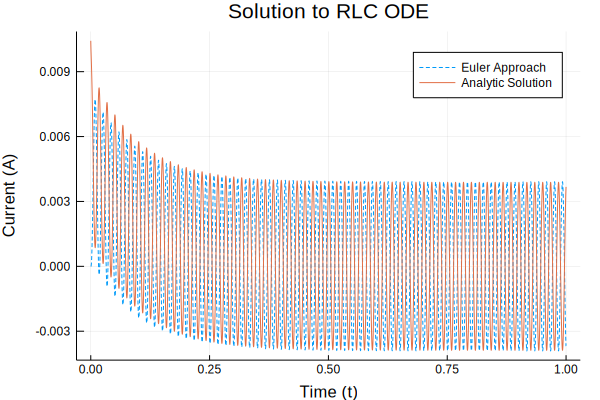

In [31]:
sol = solve(prob,Euler(),dt=0.0001)
timeVecSol = range(0,1,length=length(sol[2,:]))
plot(timeVecSol,sol[2,:],lw=1,ls=:dash,label="Euler Approach")
plot!(timeVec,[I(t) for t in timeVec], label="Analytic Solution", xaxis="Time (t)", yaxis="Current (A)", title="Solution to RLC ODE",lw=1)

Close, but not quite. Obviosuly we can make it bad by having a better timestep

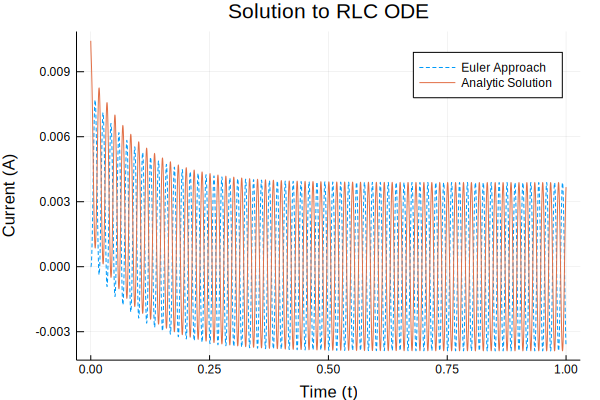

In [32]:
sol = solve(prob,Euler(),dt=0.00001)
timeVecSol = range(0,1,length=length(sol[2,:]))
plot(timeVecSol,sol[2,:],lw=1,ls=:dash,label="Euler Approach")
plot!(timeVec,[I(t) for t in timeVec], label="Analytic Solution", xaxis="Time (t)", yaxis="Current (A)", title="Solution to RLC ODE",lw=1)

Doesn't look much better, it may take more RAM than I have

Now with runge-kutta

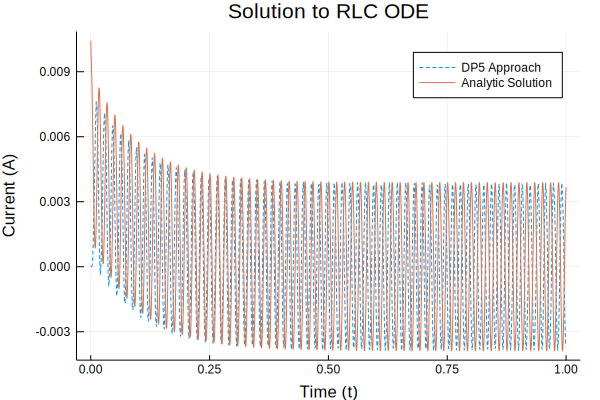

In [33]:
sol = solve(prob,DP5())
timeVecSol = range(0,1,length=length(sol[2,:]))
plot(timeVecSol,sol[2,:],lw=1,ls=:dash,label="DP5 Approach")
plot!(timeVec,[I(t) for t in timeVec], label="Analytic Solution", xaxis="Time (t)", yaxis="Current (A)", title="Solution to RLC ODE",lw=1)

It looks about the same, maybe the analytic solution was weird

If we try a bad timestep

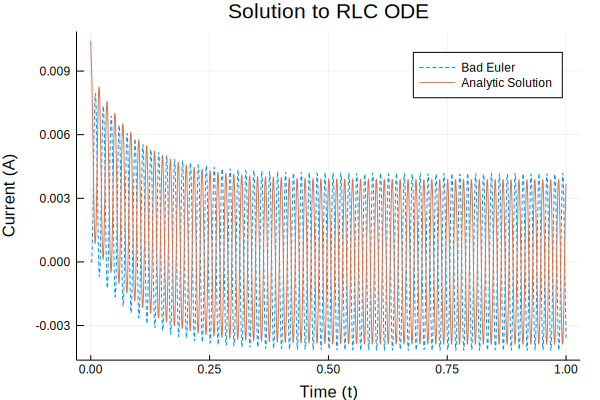

In [36]:
sol = solve(prob,Euler(),dt=0.001)
timeVecSol = range(0,1,length=length(sol[2,:]))
plot(timeVecSol,sol[2,:],lw=1,ls=:dash,label="Bad Euler")
plot!(timeVec,[I(t) for t in timeVec], label="Analytic Solution", xaxis="Time (t)", yaxis="Current (A)", title="Solution to RLC ODE",lw=1)

## Deliverable 3 - Rosenbrock Method
Even though Julia DE.jl has this builtin

Ran out of time on this - I'll work on it more later, but this is all I have.